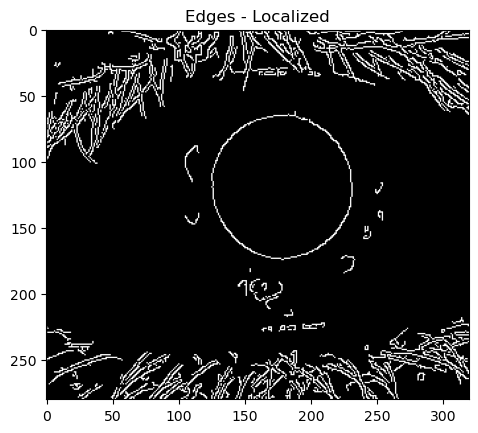

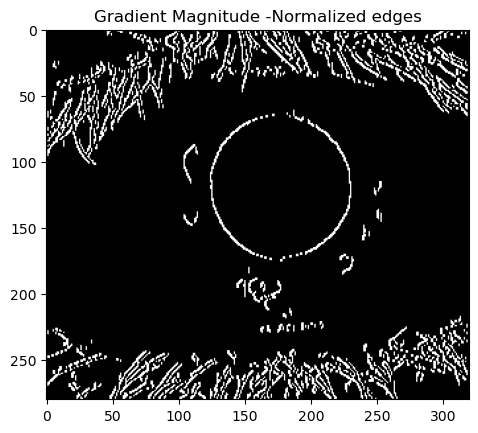

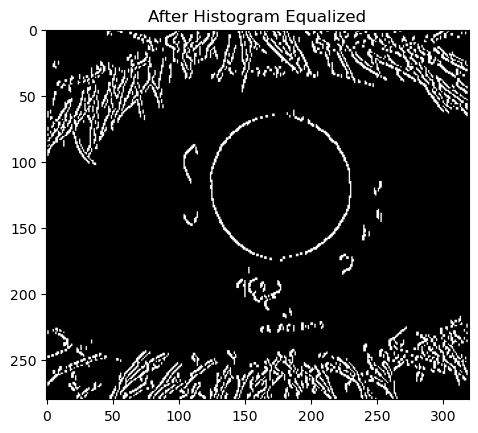

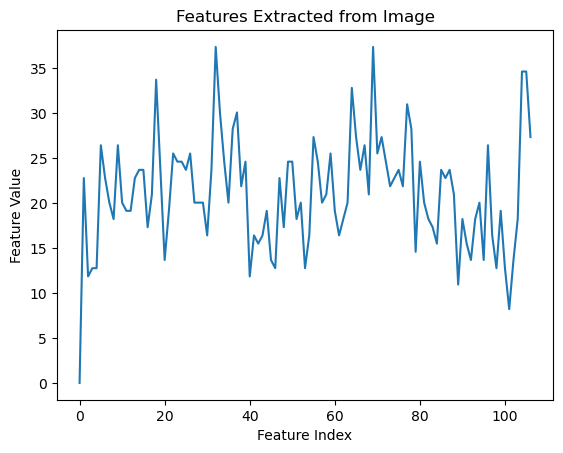

Confusion Matrix:
 [[65]]
Accuracy: 1.000
Precision: 1.000
Recall: 1.000
F1 Score: 1.000


In [17]:
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings("ignore")

# Load the training and testing images from the dataset
train_imgs = [cv2.imread(file) for file in sorted(glob.glob('CASIA Iris Image Database (version 1.0)/*/1/*.bmp'))]
test_imgs = [cv2.imread(file) for file in sorted(glob.glob('CASIA Iris Image Database (version 1.0)/*/2/*.bmp'))]

# Split the images into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_imgs, np.ones((len(train_imgs), 1)), test_size=0.2, random_state=42)

''' 
Define the localization, normalization, enhancement, and feature extraction functions
'''

def localize(img):
    # Perform edge detection using Canny algorithm
    #edges = canny(img, sigma=1, threshold=(100, 200))
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 100, 200, apertureSize=3)
    '''
    # Plot the edges
    plt.imshow(edges, cmap='gray')
    plt.title('Edges - Localized')
    plt.show()
    '''
    global iterated
    if not iterated:
        plt.imshow(edges, cmap='gray')
        plt.title('Edges - Localized')
        plt.show()
        iterated = True
    return edges


def normalize(edges):
    # Calculate the gradient magnitude and direction at each pixel
    #grad_mag, grad_dir = cv2.gradient(edges, dx=1, dy=1, ksize=3)
    grad_mag = cv2.Sobel(edges, cv2.CV_8U, 1, 0, ksize=3)
    '''
    # Plot the gradient magnitude
    plt.imshow(grad_mag, cmap='gray')
    plt.title('Gradient Magnitude -Normalized edges')
    plt.show()
    '''
    global iterated
    if not iterated:
        plt.imshow(grad_mag, cmap='gray')
        plt.title('Gradient Magnitude -Normalized edges')
        plt.show()
        iterated = True
    return grad_mag


def enhance(grad_mag):
    # Apply histogram equalization to improve contrast
    equaled_hist = cv2.equalizeHist(grad_mag)
    '''
    # Plot the equalized histogram
    plt.imshow(equaled_hist, cmap='gray')
    plt.title('Equalized Histogram')
    plt.show()
    '''
    global iterated
    if not iterated:
        plt.imshow(equaled_hist, cmap='gray')
        plt.title('After Histogram Equalized')
        plt.show()
        iterated = True
    return equaled_hist


def extract_features(equaled_hist):
    # Calculate the statistical features such as mean, variance, skewness, etc.
    features = []
    for i in range(107):
        features.append(np.mean(equaled_hist[:, i]))
    '''
    # Plot the features
    plt.plot(features)
    plt.xlabel('Feature Index')
    plt.ylabel('Feature Value')
    plt.title('Features Extracted from Image')
    plt.show()
    '''
    global iterated
    if not iterated:
        plt.plot(features)
        plt.xlabel('Feature Index')
        plt.ylabel('Feature Value')
        plt.title('Features Extracted from Image')
        plt.show()
        iterated = True
    return np.array(features)


# Apply the functions to the training and validation images
iterated = False
X_train_localized = [localize(img) for img in X_train]
X_val_localized = [localize(img) for img in X_val]
iterated = False
X_train_normalized = [normalize(img) for img in X_train_localized]
X_val_normalized = [normalize(img) for img in X_val_localized]
iterated = False
X_train_enhanced = [enhance(img) for img in X_train_normalized]
X_val_enhanced = [enhance(img) for img in X_val_normalized]
iterated = False
X_train_features = [extract_features(img) for img in X_train_enhanced]
X_val_features = [extract_features(img) for img in X_val_enhanced]
iterated = False

# Create a linear regression model and fit it to the training data
model = LinearRegression()
model.fit(X_train_features, y_train)

# Evaluate the model on the validation data
y_pred = model.predict(X_val_features)
conf_mat = confusion_matrix(y_val, y_pred)
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')
#accuracy, precision, recall, f1 = accuracy_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')

# Print the evaluation metrics
print("Confusion Matrix:\n", conf_mat)
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")